# Use a deep NN to build a binary classifier to classify the characters from Simpsons

Code from scratch a binary classifier using NN

**Data:**
- Simpsons character files 
**: https://www.kaggle.com/wcukierski/the-simpsons-by-the-data**

**Goals:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## import all datasets

In [9]:
# import some packages
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
# from lr_utils import load_dataset
from scipy import misc
%matplotlib inline
#import skimage

In [10]:
# checking individual picture (RGB)
simpson_data_dir = './data/the-simpsons-characters-dataset/simpsons_dataset/'
file_name = 'homer_simpson/pic_0002.jpg'
numpy_p1 = scipy.misc.imread(simpson_data_dir + file_name, flatten = False)
print('size of the photo is:')
print(numpy_p1.shape)

size of the photo is:
(432, 288, 3)


this is one of the pictures


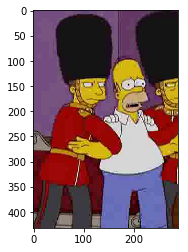

In [6]:
# Example of a picture
print("this is one of the pictures")
plt.imshow(numpy_p1)

In [11]:
# find all the characters
all_simpsons_characters = [c for c in os.listdir('./data/the-simpsons-characters-dataset/simpsons_dataset/') if c not in ('.DS_Store')]

In [22]:
# read train data into a set, 
def load_image(simpsons_dir, current_character,predict_the_character):
    
    pic_dir =  simpsons_dir + current_character + '/'
    pic_list = [p for p in os.listdir(pic_dir) if p not in ('.DS_Store')]
    files = {}
    for p in pic_list:
        
        file = scipy.misc.imread(pic_dir + p, flatten = False)
        if current_character == predict_the_character:
            files[current_character + '_' + p] = [1,file]
        else:
            files[current_character + '_' + p] = [0,file]
       
               
    return files

In [23]:
# test the load_image function on grampa's photos (913 pics)
test_dicts = load_image('./data/the-simpsons-characters-dataset/simpsons_dataset/',all_simpsons_characters[1],'abraham_grampa_simpson')
print(len(test_dicts))
print(test_dicts)


42
{'agnes_skinner_pic_0000.jpg': [0, array([[[ 79,  69, 132],
        [ 79,  69, 132],
        [ 79,  69, 132],
        ..., 
        [ 85,  78, 146],
        [ 85,  78, 146],
        [ 85,  78, 146]],

       [[ 79,  69, 132],
        [ 79,  69, 132],
        [ 79,  69, 132],
        ..., 
        [ 85,  78, 146],
        [ 85,  78, 146],
        [ 85,  78, 146]],

       [[ 79,  69, 132],
        [ 79,  69, 132],
        [ 79,  69, 132],
        ..., 
        [ 85,  78, 146],
        [ 85,  78, 146],
        [ 85,  78, 146]],

       ..., 
       [[ 66,  88, 146],
        [ 66,  88, 146],
        [ 66,  88, 146],
        ..., 
        [ 77, 111, 175],
        [ 77, 111, 175],
        [ 77, 111, 175]],

       [[ 66,  88, 146],
        [ 66,  88, 146],
        [ 66,  88, 146],
        ..., 
        [ 70, 104, 168],
        [ 70, 104, 168],
        [ 70, 104, 168]],

       [[ 66,  88, 146],
        [ 66,  88, 146],
        [ 66,  88, 146],
        ..., 
        [ 63,  97, 161],
     

In [24]:
# import all the photos and set abraham_grampa_simpson as y (if pics are grampa, then 1, othewise 0)
all_pics = {}
print("all character names:")
for character in all_simpsons_characters:
    print(character)
    pics = load_image('./data/the-simpsons-characters-dataset/simpsons_dataset/',character,'abraham_grampa_simpson')
    all_pics.update(pics)

all character names:
abraham_grampa_simpson
agnes_skinner
apu_nahasapeemapetilon
barney_gumble
bart_simpson
bumblebee_man
carl_carlson
charles_montgomery_burns
chief_wiggum
cletus_spuckler
comic_book_guy
disco_stu
edna_krabappel
fat_tony
gil
groundskeeper_willie
hans_moleman
helen_lovejoy
homer_simpson
jasper_beardly
jimbo_jones
kent_brockman
krusty_the_clown
lenny_leonard
lionel_hutz
lisa_simpson
maggie_simpson
marge_simpson
martin_prince
mayor_quimby
milhouse_van_houten
miss_hoover
moe_szyslak
ned_flanders
nelson_muntz
otto_mann
patty_bouvier
principal_skinner
professor_john_frink
rainier_wolfcastle
ralph_wiggum
selma_bouvier
sideshow_bob
sideshow_mel
snake_jailbird
troy_mcclure
waylon_smithers


In [25]:
print("The training set has in total {} photos".format(len(all_pics)) )   

The training set has in total 20933 photos


## Preprocessing the photos
- There are 20933 photos, out of them 953 photos belongs to Grampa. The goal of this exercise is to identify thoe 953 photos from 20933 photos. 
- inspect size of the photos and resize or augment the existining photos
- https://benanne.github.io/2015/03/17/plankton.html
- https://datascience.stackexchange.com/questions/5224/how-to-prepare-augment-images-for-neural-network
- the technics adopted for photo resizing are from the links above

(416, 576, 3)
(65, 65, 3)
(368, 496, 3)
(65, 65, 3)
(416, 288, 3)
(65, 65, 3)


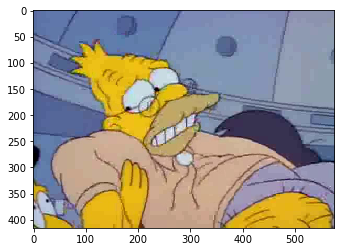

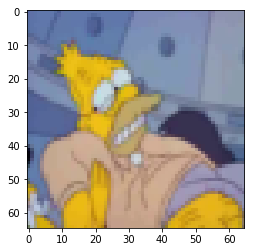

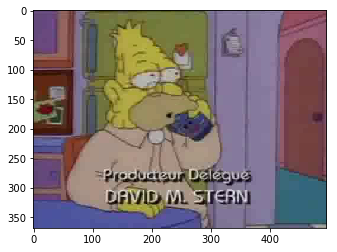

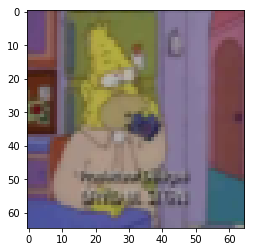

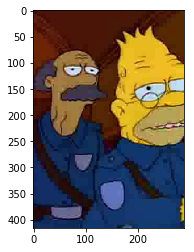

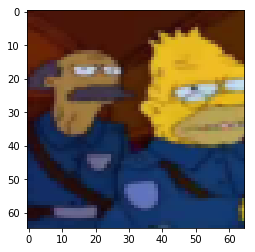

In [51]:
# inspect the size of the tables - they are in different sizes and then decide how to resize themss

list(all_pics.keys())[2]

for i in range(3):
    k = list(all_pics.items())[i]
    plt.figure()
    plt.imshow(k[1][1])
    resized_image = scipy.misc.imresize(k[1][1], (65,65))
    plt.figure()
    plt.imshow(resized_image)
    print(k[1][1].shape)
    print(resized_image.shape)

In [ ]:
# resize all the photos from the dataset


In [96]:
# create a sigmoid function (this function can be replaced by other types later)
